## Data Description:
Amazon Reviews data ( data source ) The repository has several
datasets. For this case study, we are using the Electronics
dataset.

## Domain:
E-commerce

## Context:
Online E-commerce websites like Amazon, Flipkart uses
different recommendation models to provide different
suggestions to different users. Amazon currently uses
item-to-item collaborative filtering, which scales to massive
data sets and produces high-quality recommendations in
real-time.

## Attribute Information:
● userId : Every user identified with a unique id
● productId : Every product identified with a unique id
● Rating : Rating of the corresponding product by
the corresponding user
● timestamp : Time of the rating ( ignore this column
for this exercise)

## Objective:
Build a recommendation system to recommend products to
customers based on the their previous ratings for other
products.

## 1. Exploratory Data Analysis

In [1]:
#import libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [2]:
#Read the dataset and assigning new column name to the 

rating_data=pd.read_csv("data/processed/books.csv", usecols=['customer_id', 'product_parent', 'product_title', 'product_id','star_rating','review_date'])

In [3]:
#Display the dataset
display(rating_data.shape)
rating_data.head()

(10319090, 6)

,customer_id,product_id,product_parent,product_title,star_rating,review_date
0,25933450,0439873800,84656342,There Was an Old Lady Who Swallowed a Shell!,5,2015-08-31
1,1801372,1623953553,729938122,I Saw a Friend,5,2015-08-31
2,5782091,142151981X,678139048,Black Lagoon Vol. 6,5,2015-08-31
3,32715830,014241543X,712432151,If I Stay,5,2015-08-31
4,14005703,1604600527,800572372,Stars 'N Strips Forever,5,2015-08-31


In [4]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10319090 entries, 0 to 10319089
Data columns (total 6 columns):
customer_id       int64
product_id        object
product_parent    int64
product_title     object
star_rating       int64
review_date       object
dtypes: int64(3), object(3)
memory usage: 472.4+ MB


In [5]:
cat_count = rating_data.product_parent.value_counts()
repeat_cat = cat_count[cat_count>1].count()
display(repeat_cat)
total_rows = rating_data.shape[0]
total_cat = rating_data.product_parent.nunique()
print('total rows', rating_data.shape[0])
print('total unique categories', total_cat)
print('Avg items per category', total_rows/total_cat)

954750

total rows 10319090
total unique categories 1888733
Avg items per category 5.463498546380033


In [7]:
cust_count = rating_data.customer_id.value_counts()
repeat_cust = cust_count[cust_count>1].count()
total_rows = rating_data.shape[0]
unique_cust = rating_data.customer_id.nunique()
print('total unique customers', unique_cust)
print('total repeat customers', repeat_cust)
print('Avg items per customer', total_rows/cust_count)
print('pct of repeat customers', repeat_cust/unique_cust)

total unique customers 4632497
total repeat customers 1501691
Avg items per customer 52004451    1.296042e+03
50732546    2.756904e+03
46877221    3.033242e+03
38002140    3.995002e+03
36642996    4.516013e+03
                ...     
29303968    1.031909e+07
41868447    1.031909e+07
29279388    1.031909e+07
37663890    1.031909e+07
12589059    1.031909e+07
Name: customer_id, Length: 4632497, dtype: float64
pct of repeat customers 0.32416448407845705


In [8]:
#multiple_reviews_per_product = 
rating_data.groupby('product_parent')['star_rating'].mean().reset_index()

,product_parent,star_rating
0,576,4.571429
1,645,5.000000
2,689,5.000000
3,2584,5.000000
4,3571,4.947368
...,...,...
1888728,999998042,4.000000
1888729,999998237,3.500000
1888730,999998500,4.818182
1888731,999998525,5.000000


In [9]:
rating_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10319090 entries, 0 to 10319089
Data columns (total 6 columns):
customer_id       int64
product_id        object
product_parent    int64
product_title     object
star_rating       int64
review_date       object
dtypes: int64(3), object(3)
memory usage: 472.4+ MB


In [10]:
#Shape of the data
rating_data.shape

(10319090, 6)

In [11]:
#Five point summary 
rating_data.describe().T

,count,mean,std,min,25%,50%,75%,max
customer_id,10319090.0,2.881686e+07,1.536952e+07,10024.0,15049018.0,27943498.0,4.324267e+07,53096584.0
product_parent,10319090.0,5.007382e+08,2.880390e+08,576.0,253377301.0,500457674.0,7.493292e+08,999998764.0
star_rating,10319090.0,4.447514e+00,1.033987e+00,1.0,4.0,5.0,5.000000e+00,5.0


In [12]:
## just to make sure that all Nan containing rows are deleted..
print("No of Nan values in our dataframe : ", sum(rating_data.isnull().any()))

No of Nan values in our dataframe :  0


In [13]:
#Removing duplicates from the data
dup_bool = rating_data.duplicated(['customer_id','product_id','star_rating'], keep='first')
dups = sum(dup_bool) # by considering all columns..( including timestamp)
print("There are {} duplicate rating entries in the data..".format(dups))

There are 664 duplicate rating entries in the data..


In [14]:
#Basic Statistics

print("Total data ")
print("-"*50)
print("\nTotal no of ratings :",rating_data.shape[0])
print("Total No of Users   :", len(np.unique(rating_data.customer_id)))
print("Total No of products  :", len(np.unique(rating_data.product_id)))

Total data 
--------------------------------------------------

Total no of ratings : 10319090
Total No of Users   : 4632497
Total No of products  : 2274543


In [15]:
#Dropping the Timestamp column

rating_data.drop(['review_date'], axis=1,inplace=True)

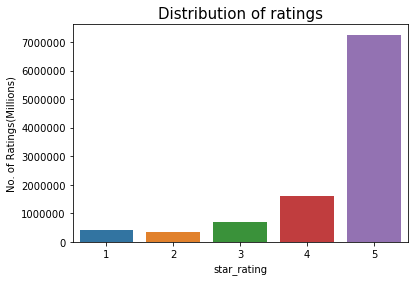

In [16]:
#Distribution of rating 

fig, ax = plt.subplots()
plt.title('Distribution of ratings', fontsize=15)
sns.countplot(rating_data.star_rating)
ax.set_ylabel('No. of Ratings(Millions)')

plt.show()



In [17]:
#Analysis of rating given by the user 

no_of_rated_products_per_user = rating_data.groupby(by='customer_id')['star_rating'].count().sort_values(ascending=False)

no_of_rated_products_per_user.head()

customer_id
52004451    7962
50732546    3743
46877221    3402
38002140    2583
36642996    2285
Name: star_rating, dtype: int64

In [18]:
no_of_rated_products_per_user.describe()

count    4.632497e+06
mean     2.227544e+00
std      8.392909e+00
min      1.000000e+00
25%      1.000000e+00
50%      1.000000e+00
75%      2.000000e+00
max      7.962000e+03
Name: star_rating, dtype: float64

In [19]:
quantiles = no_of_rated_products_per_user.quantile(np.arange(0,1.01,0.01), interpolation='higher')

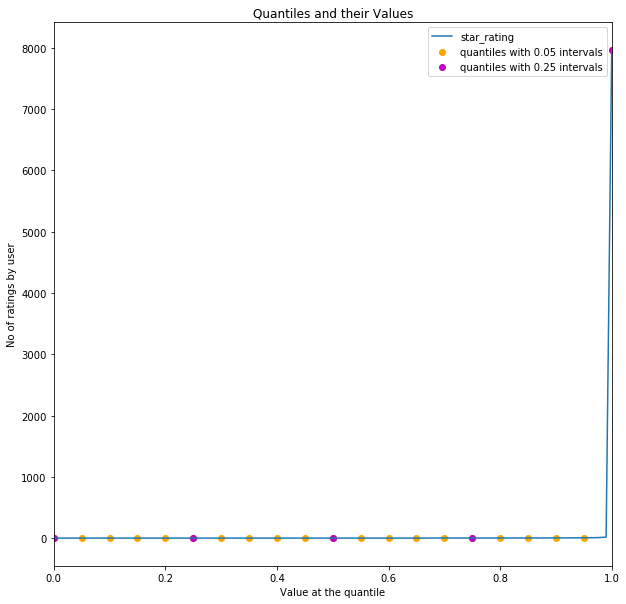

In [20]:
plt.figure(figsize=(10,10))
plt.title("Quantiles and their Values")
quantiles.plot()
# quantiles with 0.05 difference
plt.scatter(x=quantiles.index[::5], y=quantiles.values[::5], c='orange', label="quantiles with 0.05 intervals")
# quantiles with 0.25 difference
plt.scatter(x=quantiles.index[::25], y=quantiles.values[::25], c='m', label = "quantiles with 0.25 intervals")
plt.ylabel('No of ratings by user')
plt.xlabel('Value at the quantile')
plt.legend(loc='best')
plt.show()

In [21]:
print('\n No of rated product more than 50 per user : {}\n'.format(sum(no_of_rated_products_per_user >= 50)) )


 No of rated product more than 50 per user : 8262



## 2. Popularity based recommended systems

In [22]:
#Getting the new dataframe which contains users who has given 50 or more ratings

new_df=pd.read_csv('new_df.csv')

In [23]:
new_df

,Unnamed: 0,customer_id,product_id,product_title,star_rating
0,24,40676812,1938067126,Crimes of the Educators: How Utopians Are Usin...,5
1,32,40676812,0399243313,Woe is I Jr.: The Younger Grammarphobe's Guide...,5
2,44,14907137,0840029136,Brooks/Cole Empowerment Series: Essential Rese...,5
3,61,42101180,0062510630,Earth Medicine: Ancestor's Ways of Harmony for...,4
4,78,41137196,1584690623,Over in the Ocean: In a Coral Reef,5
...,...,...,...,...,...
917951,10319069,12051324,0062059939,The Selection,4
917952,10319079,37328430,1419701789,The Peculiars,3
917953,10319083,21950990,0061962767,Thumped (Bumped),4
917954,10319085,52004451,B003ZX1EQS,Teilhard De Chardin By Doran McCarty Makers o...,5


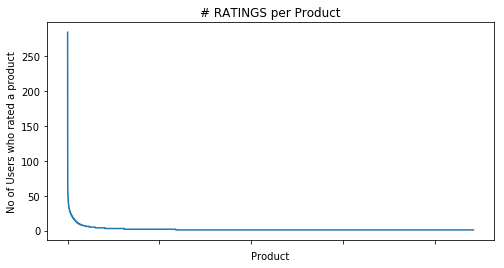

In [24]:
no_of_ratings_per_movie = new_df.groupby(by='product_id')['star_rating'].count().sort_values(ascending=False)

fig = plt.figure(figsize=plt.figaspect(.5))
ax = plt.gca()
plt.plot(no_of_ratings_per_movie.values)
plt.title('# RATINGS per Product')
plt.xlabel('Product')
plt.ylabel('No of Users who rated a product')
ax.set_xticklabels([])

plt.show()

In [25]:
#Average rating of the product 

new_df.groupby('product_id')['star_rating'].mean().head()

product_id
000077135X    5.0
0001203029    5.0
0001361155    5.0
0001381245    5.0
0001381881    5.0
Name: star_rating, dtype: float64

In [26]:
new_df.groupby('product_id')['star_rating'].mean().sort_values(ascending=False).head()

product_id
B014ICAASM    5.0
0895948036    5.0
0895946130    5.0
0895946238    5.0
089594636X    5.0
Name: star_rating, dtype: float64

In [27]:
#Total no of rating for product

new_df.groupby('product_id')['star_rating'].count().sort_values(ascending=False).head()


product_id
030758836X    284
1594633665    210
0525478817    186
0062024035    165
0061950726    163
Name: star_rating, dtype: int64

In [28]:
ratings_mean_count = pd.DataFrame(new_df.groupby('product_id')['star_rating'].mean()) 




In [29]:
ratings_mean_count['rating_counts'] = pd.DataFrame(new_df.groupby('product_id')['star_rating'].count())



In [30]:
popular_prod = ratings_mean_count[ratings_mean_count.rating_counts > 5].sort_values('rating_counts', ascending=False)
popular_prod.head()



,star_rating,rating_counts
product_id,,
030758836X,4.056338,284
1594633665,3.761905,210
0525478817,4.548387,186
0062024035,4.224242,165
0061950726,4.300613,163


In [32]:
popular_prod['product_title'] = popular_prod.apply()

TypeError: apply() missing 1 required positional argument: 'func'

In [33]:
ratings_mean_count['rating_counts'].max()

284

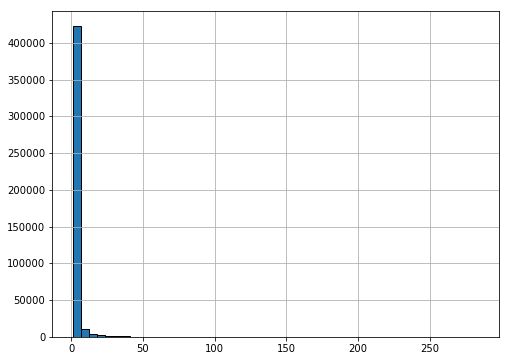

In [34]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['rating_counts'].hist(bins=50)

In [35]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
ratings_mean_count['Rating'].hist(bins=50)

KeyError: 'Rating'

<Figure size 576x432 with 0 Axes>

ValueError: Could not interpret input 'Rating'

<Figure size 576x432 with 0 Axes>

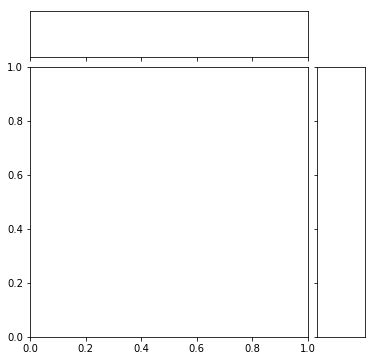

In [36]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
sns.jointplot(x='Rating', y='rating_counts', data=ratings_mean_count, alpha=0.4)

In [ ]:
popular_products = pd.DataFrame(new_df.groupby('productId')['Rating'].count())
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(30).plot(kind = "bar")


## 4. Collaberative filtering (Item-Item recommedation)

In [37]:
from surprise import KNNWithMeans
from surprise import Dataset
from surprise import accuracy
from surprise import Reader
import os
from surprise.model_selection import train_test_split

In [42]:
new_df = pd.read_csv('new_df.csv', index_col=0)
new_df = new_df.drop(columns=['product_title'])
sampled_df = new_df.sample(n=100000, random_state=1)

In [44]:
#Reading the dataset
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(sampled_df,reader)

In [45]:
#Splitting the dataset
trainset, testset = train_test_split(data, test_size=0.3,random_state=10)

In [46]:
# Use user_based true/false to switch between user-based or item-based collaborative filtering
algo = KNNWithMeans(k=5, sim_options={'name': 'pearson_baseline', 'user_based': False})
algo.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [47]:
# run the trained model against the testset
test_pred = algo.test(testset)

In [48]:
test_pred

[Prediction(uid=51704976, iid='1616145412', r_ui=4.0, est=4.3025, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid=52460875, iid='038553633X', r_ui=5.0, est=4.5, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid=23766862, iid='0312622015', r_ui=4.0, est=4.3025, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid=53012758, iid='1455553565', r_ui=4.0, est=4.3025, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid=39623326, iid='140000439X', r_ui=3.0, est=3.0, details={'actual_k': 0, 'was_impossible': False}),
 Prediction(uid=32773579, iid='1466512296', r_ui=5.0, est=4.3025, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid=17968658, iid='0440184622', r_ui=3.0, est=4.3025, details={'was_impossible': True, 'reason': 'User and/or item is unkown.'}),
 Prediction(uid=24349413, iid='0800721837', r_ui=5.0, est=4.33

In [49]:
# get RMSE
print("Item-based Model : Test Set")
accuracy.rmse(test_pred, verbose=True)

Item-based Model : Test Set
RMSE: 0.9965


0.9964847709283852

## 5. Model-based collaborative filtering system


In [51]:
new_df1=new_df.head(10000)
ratings_matrix = new_df1.pivot_table(values='star_rating', index='customer_id', 
                                     columns='product_id', fill_value=0)
ratings_matrix.head()

product_id,000470763X,0006378056,0007149832,0007162219,0007163959,0007198302,0007242638,0007251165,0007258178,0007263473,...,B013CF7ZUW,B013ILA0FW,B013J9LA9S,B013PT27PI,B013Q0TT70,B013RT9WMW,B0140EVQT0,B0149ESOGY,B0149FDZX0,B014ICAASM
customer_id,,,,,,,,,,,,,,,,,,,,,
61561,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96533,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
396880,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
421085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
705489,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


As expected, the utility matrix obtaned above is sparce, I have filled up the unknown values wth 0.


In [52]:
ratings_matrix.shape

(2767, 8288)

Transposing the matrix



In [53]:
X = ratings_matrix.T
X.head()

customer_id,61561,96533,396880,421085,705489,1034819,1173932,1293636,1330822,1348875,...,53089636,53090161,53090531,53091448,53091649,53092026,53092367,53093124,53094026,53094628
product_id,,,,,,,,,,,,,,,,,,,,,
000470763X,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0006378056,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0007149832,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0007162219,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
0007163959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
X.shape

(8288, 2767)

Unique products in subset of data



In [55]:
X1 = X

In [56]:
#Decomposing the Matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components=10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape


(8288, 10)

In [57]:
#Correlation Matrix

correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape


(8288, 8288)

 Isolating Product ID # B00000K135 from the Correlation Matrix¶


In [58]:
X.index[75]

'0060733950'

Index # of product ID purchased by customer



In [59]:
i = X.index[75]

product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

75

Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product

In [60]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(8288,)

Recommending top 25 highly correlated products in sequence


In [61]:
Recommend = list(X.index[correlation_product_ID > 0.65])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:24]

['0007544278',
 '0007544847',
 '000757939X',
 '000759397X',
 '0008125457',
 '0025471104',
 '0060006935',
 '0060463473',
 '0060516402',
 '006052961X',
 '006081246X',
 '0060838663',
 '0060846208',
 '0061138886',
 '0061240907',
 '0061240931',
 '0061375357',
 '0061379131',
 '0061582018',
 '0061655996',
 '0061804207',
 '0061991074',
 '006202065X',
 '0062026755']

Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.

